In [147]:
import glob
import numpy
import xarray
import matplotlib.pyplot as mp
import scipy.signal
import pandas
import netCDF4

In [56]:
file_list_hist = sorted(glob.glob('../california-ecoregion-output/*B20*'))
file_list_rcp = sorted(glob.glob('../california-ecoregion-output/*BRCP*'))

In [153]:
ens = ens_labels[7]
ens_files = sorted(glob.glob('../california-ecoregion-output/*_'+ens+'_*.nc'))
mfds = xarray.open_mfdataset(ens_files)#, decode_times=False)



In [158]:
ts_ens = mfds['TS'].values
ts_time = mfds['time'].values
#ts_time_converted = netCDF4.num2date(ts_time.values, units='days since 1920-01-01', calendar='noleap')

In [100]:
# detrend
ts_ens_detrend = scipy.signal.detrend(ts_ens)

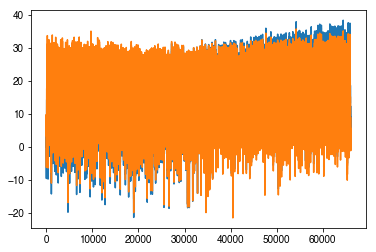

In [101]:
mp.plot(ts_ens-273.15)
mp.plot(ts_ens_detrend+numpy.nanmean(ts_ens)-273.15)

In [260]:
nyears = 30
ts_moving_std = pandas.Series(ts_ens_detrend).rolling(window=360*nyears, center=True).std()

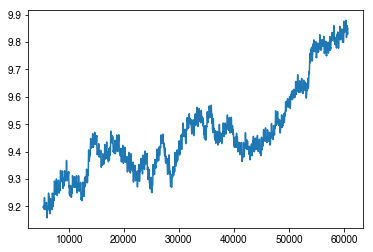

In [261]:
mp.plot(ts_moving_std)

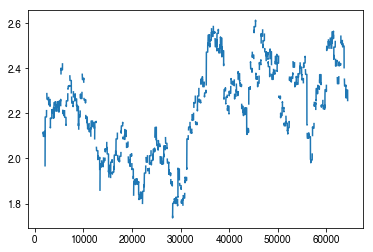

In [270]:
# pick out all Novembers
ts_time_indices_oneszeros = numpy.array([t.month in [8] for t in ts_time], \
                              dtype=numpy.int)
ts_time_indices = numpy.copy(ts_time_indices_oneszeros, dtype=numpy.float)
ts_time_indices[ts_time_indices==0] = numpy.nan


ts_ens_filtered = ts_ens_detrend[ts_time_indices_oneszeros]
ts_ens_nans = ts_ens_detrend*ts_time_indices


nyears = 10
ts_ens_filtered_std = pandas.Series(ts_ens_filtered).rolling(window=360*nyears, center=True, min_periods=300).std()

mp.plot(ts_ens_filtered_std)

